In [121]:
import os

path = os.path.join(os.path.dirname(os.getcwd()), "data")
msp_file = os.path.join(path, "MoNA-export-GC-MS.msp")

In [122]:
from matchms.filtering import normalize_intensities
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import require_minimum_number_of_peaks
import random

def apply_my_filters(s):
    s = normalize_intensities(s)
    s = reduce_to_number_of_peaks(s, n_required=10, ratio_desired=0.5)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = require_minimum_number_of_peaks(s, n_required=10)
    return s

def group_by_inchikey(spectrums):
    grouped_spectrum = []
    inchikeys = []
    for s in spectrums:
        inchikey = s.metadata.get('inchikey').split('-', 1)[0]
        if inchikey not in inchikeys:
            inchikeys.append(inchikey)
            grouped_spectrum.append([s]) 
        else:
            index = inchikeys.index(inchikey)
            grouped_spectrum[index].append(s)
    return grouped_spectrum

def separate_by_same_inchikey(spectrums):
    return random.sample([k for k in group_by_inchikey(spectrums) if len(k) == 2], 1000)

def separate_by_diff_inchikey(spectrums):
    # grouped_spectrum = group_by_inchikey(spectrums)
    # shuffled1 = random.sample(grouped_spectrum, len(grouped_spectrum))
    # shuffled2 = random.sample(grouped_spectrum, len(grouped_spectrum))
    # selectec_spectra = []
    # for n in range(0, 1000):
    #     selectec_spectra.append([shuffled1[n][0], shuffled2[n][0]])
    # return selectec_spectra

    selected_spectrum = [[g[0]] for g in spectrums]
        
    for k, e in enumerate(selected_spectrum):
        diff_mol = random.sample(spectrums, 1)
        while e[0].metadata['inchikey'].split(',', 1)[0] == diff_mol[0][1].metadata['inchikey'].split(',', 1)[0]:
            diff_mol = random.sample(spectrums, 1)
        selected_spectrum[k].append(diff_mol[0][1])

    return selected_spectrum

In [123]:
import numpy as np

def calculate_similarity_scores(spectrums):
    scores_hist = []
    for k, spectrums in enumerate(group_spectra):
        scores = calculate_scores(references=spectrums,
                                queries=spectrums,
                                similarity_function=CosineGreedy())

        print(k+1, "================================")
        for k, score in enumerate(scores):
            if k == 1:
                (reference, query, score, n_matching) = score

                scores_hist.append(score)

                print(f"Reference scan name: {reference.metadata['name']} - Query scan name: {query.metadata['name']}")
                print(f"Reference InChiKey: {reference.metadata['inchikey']} - Query InChiKey: {query.metadata['inchikey']}")
                print(f"Score: {score:.4f}")
                print(f"Number of matching peaks: {n_matching}")
                print("----------------------------")

    return np.array(scores_hist)

In [124]:
from matchms.importing import load_from_msp

spectrums = [apply_my_filters(s) for s in load_from_msp(msp_file)]

spectrums = [s for s in spectrums if s is not None]

In [125]:
from matchms import calculate_scores
from matchms.similarity import CosineGreedy

copy_spectra = spectrums.copy()
group_spectra = separate_by_same_inchikey(copy_spectra)
scores_hist = calculate_similarity_scores(group_spectra)

1 ================================
Reference scan name: 2,2-dimethylpropyl acetate - Query scan name: 2,2-dimethylpropyl acetate
Reference InChiKey: qlnytcselyeepv-uhfffaoysa-n - Query InChiKey: qlnytcselyeepv-uhfffaoysa-n
Score: 0.5659
Number of matching peaks: 11
----------------------------
2 ================================
Reference scan name: gamma-linolenic acid - Query scan name: gamma-linolenic acid
Reference InChiKey: vzccetwtmqhepk-qnebeihssa-n - Query InChiKey: vzccetwtmqhepk-qnebeihssa-n
Score: 0.6267
Number of matching peaks: 84
----------------------------
3 ================================
Reference scan name: hexamethyldisiloxane - Query scan name: hexamethyldisiloxane
Reference InChiKey: uqeaihbtyfgyie-uhfffaoysa-n - Query InChiKey: uqeaihbtyfgyie-uhfffaoysa-n
Score: 0.9763
Number of matching peaks: 13
----------------------------
4 ================================
Reference scan name: 1,10-dicyano-decane - Query scan name: 1,10-dicyanodecane
Reference InChiKey: avqyx

Reference scan name: 5-tert-butyl-3,3-dimethyl-1-indanone - Query scan name: 5-tert-butyl-3,3-dimethyl-1-indanone
Reference InChiKey: uaymljqajqasdb-uhfffaoysa-n - Query InChiKey: uaymljqajqasdb-uhfffaoysa-n
Score: 1.0000
Number of matching peaks: 31
----------------------------
134 ================================
Reference scan name: dl-alpha-phenylpropionic acid trimethylsilyl ester - Query scan name: dl-alpha-phenylpropionic acid trimethylsilyl ester
Reference InChiKey: omyjqvpbiwduao-uhfffaoysa-n - Query InChiKey: omyjqvpbiwduao-uhfffaoysa-n
Score: 1.0000
Number of matching peaks: 18
----------------------------
135 ================================
Reference scan name: 1,2-cyclohexylene diacetate - Query scan name: 1,2-cyclohexylene diacetate
Reference InChiKey: nstpwrqtpxjrsp-uhfffaoysa-n - Query InChiKey: nstpwrqtpxjrsp-uhfffaoysa-n
Score: 0.4935
Number of matching peaks: 17
----------------------------
136 ================================
Reference scan name: 1,3-diphenylaceton

200 ================================
Reference scan name: cis-4-nonene - Query scan name: trans-4-nonene
Reference InChiKey: kpadfpailitqbg-vqhvlokhsa-n - Query InChiKey: kpadfpailitqbg-vqhvlokhsa-n
Score: 0.8724
Number of matching peaks: 21
----------------------------
201 ================================
Reference scan name: 6,7-epoxyoctadecanoic acid methyl ester - Query scan name: 6,7-epoxyoctadecanoic acid methyl ester
Reference InChiKey: xzbrnqgaedoqpt-uhfffaoysa-n - Query InChiKey: xzbrnqgaedoqpt-uhfffaoysa-n
Score: 0.4648
Number of matching peaks: 73
----------------------------
202 ================================
Reference scan name: 1,2-dibromoethane - Query scan name: 1,2-dibromoethane
Reference InChiKey: paazparnphgikf-uhfffaoysa-n - Query InChiKey: paazparnphgikf-uhfffaoysa-n
Score: 0.6999
Number of matching peaks: 13
----------------------------
203 ================================
Reference scan name: (z,z)-3,6-dodecadien-1-ol - Query scan name: (z,z)-3,6-dodecadien-1-o

267 ================================
Reference scan name: 1,1,3,3-tetramethyl-1-butylamine - Query scan name: 1,1,3,3-tetramethylbutylamine
Reference InChiKey: qijiujyandsekg-uhfffaoysa-n - Query InChiKey: qijiujyandsekg-uhfffaoysa-n
Score: 0.9215
Number of matching peaks: 14
----------------------------
268 ================================
Reference scan name: tetrachlorophthalic anhydride - Query scan name: tetrachlorophthalic anhydride
Reference InChiKey: auhhyelhrwcwez-uhfffaoysa-n - Query InChiKey: auhhyelhrwcwez-uhfffaoysa-n
Score: 0.9995
Number of matching peaks: 57
----------------------------
269 ================================
Reference scan name: diethyl ether - Query scan name: diethyl ether
Reference InChiKey: rtzkzfjdlaiyfh-uhfffaoysa-n - Query InChiKey: rtzkzfjdlaiyfh-uhfffaoysa-n
Score: 0.7767
Number of matching peaks: 15
----------------------------
270 ================================
Reference scan name: methampyrone - Query scan name: sulpyrine
Reference InChiKey: 

344 ================================
Reference scan name: 1,2-dihydroxylbutane - Query scan name: propyleneglycol
Reference InChiKey: bmrwnkzvcukksr-uhfffaoysa-n - Query InChiKey: bmrwnkzvcukksr-uhfffaoysa-n
Score: 0.0000
Number of matching peaks: 0
----------------------------
345 ================================
Reference scan name: 1-iodo-4-nitrobenzene - Query scan name: 4-iodonitrobenzene
Reference InChiKey: scccfnjtcdslcy-uhfffaoysa-n - Query InChiKey: scccfnjtcdslcy-uhfffaoysa-n
Score: 0.6217
Number of matching peaks: 19
----------------------------
346 ================================
Reference scan name: harmaline - Query scan name: harmaline
Reference InChiKey: qjozjxnkvmfaet-uhfffaoysa-n - Query InChiKey: qjozjxnkvmfaet-uhfffaoysa-n
Score: 0.8409
Number of matching peaks: 81
----------------------------
347 ================================
Reference scan name: para fluoro nitrobenzene - Query scan name: para fluoro nitrobenzene
Reference InChiKey: wfqdtoydvuwqms-uhfffaoysa-n

437 ================================
Reference scan name: pentyl salicylate - Query scan name: amyl salicylate
Reference InChiKey: ranvdunfzbmtbk-uhfffaoysa-n - Query InChiKey: ranvdunfzbmtbk-uhfffaoysa-n
Score: 0.9410
Number of matching peaks: 14
----------------------------
438 ================================
Reference scan name: 2-furoic acid - Query scan name: 2-furoic acid
Reference InChiKey: smndyuvbfmfknz-uhfffaoysa-n - Query InChiKey: smndyuvbfmfknz-uhfffaoysa-n
Score: 0.9138
Number of matching peaks: 22
----------------------------
439 ================================
Reference scan name: n-glycolylneuraminic acid - Query scan name: n-glycolylneuraminic acid
Reference InChiKey: fdjkuwyyuzcujx-ajkrcsplsa-n - Query InChiKey: fdjkuwyyuzcujx-ajkrcsplsa-n
Score: 0.8882
Number of matching peaks: 94
----------------------------
440 ================================
Reference scan name: methyl para amino benzoate - Query scan name: methyl p-aminobenzoate
Reference InChiKey: lzxxnpoyqc

534 ================================
Reference scan name: threose - Query scan name: threose
Reference InChiKey: fmaorjiqymirhf-lkhoqcsesa-n - Query InChiKey: fmaorjiqymirhf-lkhoqcsesa-n
Score: 0.9880
Number of matching peaks: 49
----------------------------
535 ================================
Reference scan name: 4-acetylbutyric acid - Query scan name: 4-acetylbutyric acid
Reference InChiKey: mgtzclmlssaxld-uhfffaoysa-n - Query InChiKey: mgtzclmlssaxld-uhfffaoysa-n
Score: 0.7728
Number of matching peaks: 76
----------------------------
536 ================================
Reference scan name: n-methyl-2-pyrrolidone - Query scan name: 1-methyl-2-pyrrolidinone
Reference InChiKey: secxisvlqfmrjm-uhfffaoysa-n - Query InChiKey: secxisvlqfmrjm-uhfffaoysa-n
Score: 0.9338
Number of matching peaks: 16
----------------------------
537 ================================
Reference scan name: n-acetyl-valyl-glycyl-alanine methylester - Query scan name: n-acetylvalylglycylalanine methyl ester
Refere

626 ================================
Reference scan name: 5-alpha-cholestan-3-beta-yl benzoate - Query scan name: 5-alpha-cholestan-3-alpha-yl benzoate
Reference InChiKey: yvxzawfndqlxbu-butihpcesa-n - Query InChiKey: yvxzawfndqlxbu-yvypuypbsa-n
Score: 0.9668
Number of matching peaks: 95
----------------------------
627 ================================
Reference scan name: dopamine - Query scan name: dopamine
Reference InChiKey: vyfyytllbukuhu-uhfffaoysa-n - Query InChiKey: vyfyytllbukuhu-uhfffaoysa-n
Score: 0.9653
Number of matching peaks: 85
----------------------------
628 ================================
Reference scan name: 11-ketoandrosterone - Query scan name: 11-ketoetiocholanolone
Reference InChiKey: iunygqonjqtull-ukzlpjrtsa-n - Query InChiKey: iunygqonjqtull-ukzlpjrtsa-n
Score: 0.4478
Number of matching peaks: 83
----------------------------
629 ================================
Reference scan name: 3-(2-hydroxyphenyl)propanoic acid - Query scan name: 3-(2-hydroxyphenyl)propi

707 ================================
Reference scan name: m-coumaric acid - Query scan name: 3-hydroxycinnamic acid
Reference InChiKey: kksdgjdhhzewep-snawjcmrsa-n - Query InChiKey: kksdgjdhhzewep-snawjcmrsa-n
Score: 0.9253
Number of matching peaks: 84
----------------------------
708 ================================
Reference scan name: 1,6-dimethyl-3,4-benzo-2-oxabicyclo(4.1.0)hept-3-en-5-one - Query scan name: 1,6-dimethyl-3,4-benzo-2-oxabicyclo(4.1.0)hept-3-en-5-one
Reference InChiKey: ikupbruxxgsvlp-uhfffaoysa-n - Query InChiKey: ikupbruxxgsvlp-uhfffaoysa-n
Score: 0.7852
Number of matching peaks: 46
----------------------------
709 ================================
Reference scan name: trans-bicyclo(4.4.0)decane - Query scan name: cis-bicyclo(4.4.0)decane
Reference InChiKey: nnbzcpxtihjbjl-mgcohnpysa-n - Query InChiKey: nnbzcpxtihjbjl-uhfffaoysa-n
Score: 0.7790
Number of matching peaks: 27
----------------------------
710 ================================
Reference scan name: 2,4-di

825 ================================
Reference scan name: cis-jasmone - Query scan name: jasmone
Reference InChiKey: xmlsxpivaxondl-plngdyqasa-n - Query InChiKey: xmlsxpivaxondl-plngdyqasa-n
Score: 0.5922
Number of matching peaks: 73
----------------------------
826 ================================
Reference scan name: 1,1,2,2,3,3-hexamethyltrisilane - Query scan name: 1,1,2,2,3,3-hexamethyltrisilane (d2)
Reference InChiKey: jsbovjabzfdrgv-uhfffaoysa-n - Query InChiKey: jsbovjabzfdrgv-uhfffaoysa-n
Score: 0.7962
Number of matching peaks: 40
----------------------------
827 ================================
Reference scan name: hexadecanoic acid butyl ester - Query scan name: hexadecanoic acid butyl ester
Reference InChiKey: glyjvqdylfaufc-uhfffaoysa-n - Query InChiKey: glyjvqdylfaufc-uhfffaoysa-n
Score: 0.0825
Number of matching peaks: 4
----------------------------
828 ================================
Reference scan name: 1-bromo-3-chloropropane - Query scan name: 1-bromo-3-chloropropan

934 ================================
Reference scan name: urethan - Query scan name: urethane
Reference InChiKey: joyrkodldbilnp-uhfffaoysa-n - Query InChiKey: joyrkodldbilnp-uhfffaoysa-n
Score: 0.9683
Number of matching peaks: 25
----------------------------
935 ================================
Reference scan name: dl-threo-beta-methylaspartic acid - Query scan name: dl-threo-beta-methylaspartic acid
Reference InChiKey: lxruaybiusuulx-hrfvkafmsa-n - Query InChiKey: lxruaybiusuulx-uhfffaoysa-n
Score: 0.2052
Number of matching peaks: 73
----------------------------
936 ================================
Reference scan name: 2,3-dimethoxybenzoic acid methyl ester - Query scan name: 2,3-dimethoxybenzoic acid methyl ester
Reference InChiKey: mglimpupakqitq-uhfffaoysa-n - Query InChiKey: mglimpupakqitq-uhfffaoysa-n
Score: 0.4605
Number of matching peaks: 30
----------------------------
937 ================================
Reference scan name: pentyl benzene - Query scan name: pentylbenzene
Re

993 ================================
Reference scan name: trans-linalool oxide - Query scan name: 2-ethenyl-2-methyl-5-(1-methyl-1-hydroxy)ethyltetrahydrofuran
Reference InChiKey: brhddeirqpdpmg-wcbmzhexsa-n - Query InChiKey: brhddeirqpdpmg-uhfffaoysa-n
Score: 0.7906
Number of matching peaks: 43
----------------------------
994 ================================
Reference scan name: 2-(3-formyl)butyl-1,3,3-trimethylcyclohex-1-ene - Query scan name: 2-methyl-4-(2,6,6-trimethyl-2-cyclohexen-2-yl)butanal
Reference InChiKey: mxnvwzzddfiwhw-uhfffaoysa-n - Query InChiKey: mxnvwzzddfiwhw-uhfffaoysa-n
Score: 0.6741
Number of matching peaks: 34
----------------------------
995 ================================
Reference scan name: 6alpha-hydroxy-5alpha-cholan-24-oic acid methyl ester - Query scan name: 6beta-hydroxy-5alpha-cholan-24-oic acid methyl ester
Reference InChiKey: mopcjiimylcqcf-ifijbtqosa-n - Query InChiKey: mopcjiimylcqcf-uetnctresa-n
Score: 0.9593
Number of matching peaks: 91
--------

1000


(array([ 83.,  47.,  40.,  41.,  55.,  65.,  79.,  98., 161., 331.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

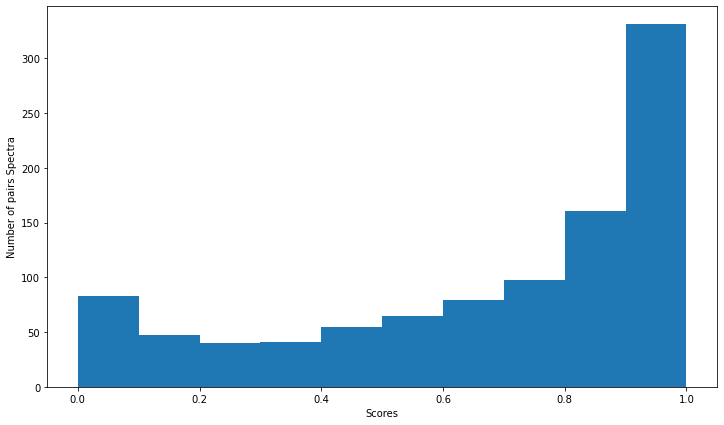

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
print(len(scores_hist))
hist = plt.hist(scores_hist)
plt.xlabel("Scores")
plt.ylabel("Number of pairs Spectra")

hist

In [127]:
# copy_spectra = spectrums.copy()
group_spectra = separate_by_diff_inchikey(group_spectra)
scores_hist2 = calculate_similarity_scores(group_spectra)

1 ================================
Reference scan name: 2,2-dimethylpropyl acetate - Query scan name: benzaldehyde-4-carboxylic acid trimethylsilyl ester
Reference InChiKey: qlnytcselyeepv-uhfffaoysa-n - Query InChiKey: lllsjlofpkecpd-uhfffaoysa-n
Score: 0.0200
Number of matching peaks: 1
----------------------------
2 ================================
Reference scan name: gamma-linolenic acid - Query scan name: 4-methoxybenzophenone
Reference InChiKey: vzccetwtmqhepk-qnebeihssa-n - Query InChiKey: swfhgtmlyibppa-uhfffaoysa-n
Score: 0.1079
Number of matching peaks: 23
----------------------------
3 ================================
Reference scan name: hexamethyldisiloxane - Query scan name: 6beta-hydroxy-5alpha-cholan-24-oic acid methyl ester
Reference InChiKey: uqeaihbtyfgyie-uhfffaoysa-n - Query InChiKey: mopcjiimylcqcf-uetnctresa-n
Score: 0.1172
Number of matching peaks: 12
----------------------------
4 ================================
Reference scan name: 1,10-dicyano-decane - Quer

30 ================================
Reference scan name: 17beta-acetoxy-1alpha-hydroxy-5alpha-androst-2-ene - Query scan name: ethylene tridecanedioate
Reference InChiKey: dkrvgisyzlhnhz-nduydnqlsa-n - Query InChiKey: xrhcagnsdhchfj-uhfffaoysa-n
Score: 0.0624
Number of matching peaks: 35
----------------------------
31 ================================
Reference scan name: heptane - Query scan name: 3-cyclohexene-1-carboxylic acid methyl ester
Reference InChiKey: imnfdufmrhmdmm-uhfffaoysa-n - Query InChiKey: ipunvlfesxfvfh-uhfffaoysa-n
Score: 0.0640
Number of matching peaks: 9
----------------------------
32 ================================
Reference scan name: methyl cyanoformate - Query scan name: 3,4,5-trimethoxybenzoic acid methyl ester
Reference InChiKey: obwfjxlkrafedi-uhfffaoysa-n - Query InChiKey: kachfmohopltnx-uhfffaoysa-n
Score: 0.0015
Number of matching peaks: 1
----------------------------
33 ================================
Reference scan name: methyl 4-acetylaminobenzoate

114 ================================
Reference scan name: 3,5-dihydroxyphenylglycine - Query scan name: linalool
Reference InChiKey: hoowcuzpefnhdt-uhfffaoysa-n - Query InChiKey: cdoshbssfjomgt-uhfffaoysa-n
Score: 0.0059
Number of matching peaks: 15
----------------------------
115 ================================
Reference scan name: triacontane - Query scan name: theobromine
Reference InChiKey: jxtpjddicstxjx-uhfffaoysa-n - Query InChiKey: yapqbxqyljrxsa-uhfffaoysa-n
Score: 0.0353
Number of matching peaks: 43
----------------------------
116 ================================
Reference scan name: 2,3-dimethyl-6-nitro-5-trideuteromethoxyindole - Query scan name: 1-bromonaphthalene
Reference InChiKey: zlsbcsfibggdqs-uhfffaoysa-n - Query InChiKey: dlkqhbokullwdq-uhfffaoysa-n
Score: 0.0040
Number of matching peaks: 13
----------------------------
117 ================================
Reference scan name: (z)-3,7-dimethyl-2,6-octadienyl heptanoate - Query scan name: 6,7-epoxyoctadecanoic aci

205 ================================
Reference scan name: (z,z)-12,15-octadecadienoic acid methyl ester - Query scan name: diethyl 1,1-cyclopropanedicarboxylate
Reference InChiKey: sqxlghnkhznvrt-utoquplusa-n - Query InChiKey: kyyuczohnyslfv-uhfffaoysa-n
Score: 0.0770
Number of matching peaks: 21
----------------------------
206 ================================
Reference scan name: 4-aminohippuric acid - Query scan name: methyl n-phenyldithiocarbamate
Reference InChiKey: hsmnqinekmptic-uhfffaoysa-n - Query InChiKey: moosrnwdpwtobf-uhfffaoysa-n
Score: 0.0135
Number of matching peaks: 10
----------------------------
207 ================================
Reference scan name: di-tert-butyl peroxide - Query scan name: 2-ethenyl-2-methyl-5-(1-methyl-1-hydroxy)ethyltetrahydrofuran
Reference InChiKey: lsxwfxongksemy-uhfffaoysa-n - Query InChiKey: brhddeirqpdpmg-uhfffaoysa-n
Score: 0.2434
Number of matching peaks: 14
----------------------------
208 ================================
Reference sca

252 ================================
Reference scan name: para-methoxybenzophenone - Query scan name: asulam
Reference InChiKey: swfhgtmlyibppa-uhfffaoysa-n - Query InChiKey: vgpyehkoignjkv-uhfffaoysa-n
Score: 0.0069
Number of matching peaks: 2
----------------------------
253 ================================
Reference scan name: 3-para-menthen-5-yl acetate - Query scan name: isopropyl bromide
Reference InChiKey: uwinauqiajdqek-uhfffaoysa-n - Query InChiKey: namykgvdvnbcfq-uhfffaoysa-n
Score: 0.1580
Number of matching peaks: 13
----------------------------
254 ================================
Reference scan name: n-acetylglycine - Query scan name: 3,5,5-trimethyl-2-cyclohexenone
Reference InChiKey: okjirpaqvshgfk-uhfffaoysa-n - Query InChiKey: hjovhmdzyocnqw-uhfffaoysa-n
Score: 0.0255
Number of matching peaks: 5
----------------------------
255 ================================
Reference scan name: l-cysteic acid - Query scan name: acrolein
Reference InChiKey: xvoyscvbglvsol-reohclbhsa-

318 ================================
Reference scan name: 1,4-bis(dimethylsilyl)butane - Query scan name: 2-phenylpropionic acid
Reference InChiKey: qlpzdswclqmgcv-uhfffaoysa-n - Query InChiKey: ypgcwemnnlxisk-uhfffaoysa-n
Score: 0.0288
Number of matching peaks: 15
----------------------------
319 ================================
Reference scan name: citronellol - Query scan name: 4,5-dimethylthiazole
Reference InChiKey: qmvpmaafgqkvcj-uhfffaoysa-n - Query InChiKey: uwsonzcnxustkw-uhfffaoysa-n
Score: 0.0093
Number of matching peaks: 1
----------------------------
320 ================================
Reference scan name: 1-hexadecyl-2,3-di-o-acethyl glycerol - Query scan name: para-nonylphenol
Reference InChiKey: rnbqlchipdbxcf-uhfffaoysa-n - Query InChiKey: igfhqqfpsibgke-uhfffaoysa-n
Score: 0.0310
Number of matching peaks: 18
----------------------------
321 ================================
Reference scan name: hydroxyphenyllactic acid - Query scan name: cyclopentane
Reference InChiKe

384 ================================
Reference scan name: trimethylsilyl-1,3-butadiyne - Query scan name: dl-threo-beta-methylaspartic acid
Reference InChiKey: gvchydymliwqpe-uhfffaoysa-n - Query InChiKey: lxruaybiusuulx-uhfffaoysa-n
Score: 0.0448
Number of matching peaks: 9
----------------------------
385 ================================
Reference scan name: bis(2-cyanoethyl)ether - Query scan name: trimethylolpropane trimethacrylate
Reference InChiKey: bcgcctgnwpkxjl-uhfffaoysa-n - Query InChiKey: okkrpwiiyqtpqf-uhfffaoysa-n
Score: 0.0002
Number of matching peaks: 1
----------------------------
386 ================================
Reference scan name: di-isodecyl phthalate - Query scan name: cyclobarbital
Reference InChiKey: zvfdtkuvrcthqe-uhfffaoysa-n - Query InChiKey: wtygauxicfettc-uhfffaoysa-n
Score: 0.0503
Number of matching peaks: 20
----------------------------
387 ================================
Reference scan name: p-nonyl phenol - Query scan name: bis(2-butoxyethyl) phtha

457 ================================
Reference scan name: 3alpha,4beta,7alpha,12alpha-tetrahydroxy-5beta-cholan-24-oic acid methyl ester - Query scan name: 2,4-dimethylquinoline
Reference InChiKey: siaxnmmfzgxytk-ahtushbzsa-n - Query InChiKey: ztnanfdsjrrzrj-uhfffaoysa-n
Score: 0.0445
Number of matching peaks: 8
----------------------------
458 ================================
Reference scan name: ethyl isovalerate - Query scan name: tricosane
Reference InChiKey: ppxuheorwjqrhj-uhfffaoysa-n - Query InChiKey: figvvzuwclsuei-uhfffaoysa-n
Score: 0.4897
Number of matching peaks: 15
----------------------------
459 ================================
Reference scan name: promethazine - Query scan name: kuwanon-c
Reference InChiKey: pwwvaxiegoywee-uhfffaoysa-n - Query InChiKey: uwqyblohtqwsqd-uhfffaoysa-n
Score: 0.0000
Number of matching peaks: 0
----------------------------
460 ================================
Reference scan name: 7-methoxy(trans)flavan-4beta-ol - Query scan name: n-cyclohexyl

538 ================================
Reference scan name: methyl 10-oxoundecanoate - Query scan name: sulpyrine
Reference InChiKey: txrmrskjqbfmrq-uhfffaoysa-n - Query InChiKey: djgaapfspwaytj-uhfffaoysa-m
Score: 0.0576
Number of matching peaks: 7
----------------------------
539 ================================
Reference scan name: methyl 2-((1e),(3z)-3-methyl-7-oxoocta-1,3-dienyl)-1,3-dimethyl-4-oxocyclohex-2-enyl-1-carboxylate - Query scan name: halfordin (14-cd3)
Reference InChiKey: ibeklxnzxqhtgy-ouoiihkdsa-n - Query InChiKey: shoqqsabouvqlj-uhfffaoysa-n
Score: 0.0049
Number of matching peaks: 3
----------------------------
540 ================================
Reference scan name: 5,7-dihydroxy-6,8-dimethyl-4'-methoxyflavanone - Query scan name: salicylaldehyde oxime
Reference InChiKey: dztrdrpcroosog-uhfffaoysa-n - Query InChiKey: orihzizptztncu-vmpitwqzsa-n
Score: 0.0000
Number of matching peaks: 0
----------------------------
541 ================================
Reference scan 

608 ================================
Reference scan name: cis-ethyl-linalyl acetate - Query scan name: methyl 2-furoate
Reference InChiKey: ivszehydolarek-luawrhefsa-n - Query InChiKey: hdjlsecjeqspkw-uhfffaoysa-n
Score: 0.0731
Number of matching peaks: 13
----------------------------
609 ================================
Reference scan name: octanoic acid butyl ester - Query scan name: 2-phenylpropionic acid
Reference InChiKey: psxndmjwrzyvtm-uhfffaoysa-n - Query InChiKey: ypgcwemnnlxisk-uhfffaoysa-n
Score: 0.0160
Number of matching peaks: 13
----------------------------
610 ================================
Reference scan name: methyl ortho toluate - Query scan name: ortho-bromotoluene
Reference InChiKey: wvwzecqnfwfvfw-uhfffaoysa-n - Query InChiKey: qssxjpiwxqtsix-uhfffaoysa-n
Score: 0.4074
Number of matching peaks: 12
----------------------------
611 ================================
Reference scan name: cis-3-hexene - Query scan name: monoolein
Reference InChiKey: zqdpjfuhlcocrg-aatr

665 ================================
Reference scan name: 2-ethylhexyl acrylate - Query scan name: methyl 3,4,6-tri-o-methyl mannopyranoside
Reference InChiKey: goxqrtzxkqzddn-uhfffaoysa-n - Query InChiKey: mjcqvuqcevaclb-zozbqhsosa-n
Score: 0.0042
Number of matching peaks: 7
----------------------------
666 ================================
Reference scan name: 2-methylquinoline - Query scan name: benzoylacetone
Reference InChiKey: smuqfggvlnaioz-uhfffaoysa-n - Query InChiKey: cvbukmmmrlokqr-uhfffaoysa-n
Score: 0.0192
Number of matching peaks: 24
----------------------------
667 ================================
Reference scan name: 2-(2,3-ditrimethylsilyloxybutoxy)-n-(2-(diethylamino)ethyl)-3-pyridinecarboxamide - Query scan name: 2,2-dimethylsuccinic acid
Reference InChiKey: xicrcylrbrtkbz-uhfffaoysa-n - Query InChiKey: gohptlypqctzse-uhfffaoysa-n
Score: 0.0213
Number of matching peaks: 11
----------------------------
668 ================================
Reference scan name: hexanoic 

747 ================================
Reference scan name: 1,2-benzenedicarboxylic acid decyl octyl ester - Query scan name: n-nitrosodicyclohexylamine
Reference InChiKey: lvagmbhlxlzjkz-uhfffaoysa-n - Query InChiKey: cymnkxlbemeabs-uhfffaoysa-n
Score: 0.1324
Number of matching peaks: 25
----------------------------
748 ================================
Reference scan name: halostachine - Query scan name: 1,2-dibromopropane
Reference InChiKey: zctyhonegjtyqv-uhfffaoysa-n - Query InChiKey: xfnjyakdbjujaj-uhfffaoysa-n
Score: 0.0135
Number of matching peaks: 26
----------------------------
749 ================================
Reference scan name: 3alpha,4beta,7alpha-trihydroxy-5beta-cholan-24-oic acid methyl ester - Query scan name: citronellyl formate
Reference InChiKey: bplrqlcqzueynh-whuwprsfsa-n - Query InChiKey: dznvizqpwldqhi-uhfffaoysa-n
Score: 0.0137
Number of matching peaks: 3
----------------------------
750 ================================
Reference scan name: 2-propylamine - Que

847 ================================
Reference scan name: kuwanon-c - Query scan name: 2,8-ditrimethylsilyloxy-4-quinolinecarboxylic acid trimethylsilyl ester
Reference InChiKey: uwqyblohtqwsqd-uhfffaoysa-n - Query InChiKey: skppdkjsrkvmfu-uhfffaoysa-n
Score: 0.3885
Number of matching peaks: 9
----------------------------
848 ================================
Reference scan name: 2,4-diformyl-6-ethoxy phenol - Query scan name: 2,5-diacetoxy-2,5-dimethyl-3-hexyne
Reference InChiKey: wqwnvpgjvkvzdh-uhfffaoysa-n - Query InChiKey: jtsbdfupocmobr-uhfffaoysa-n
Score: 0.0042
Number of matching peaks: 7
----------------------------
849 ================================
Reference scan name: 1-trimethylsilyloxy-4-butoxybenzene - Query scan name: o-methoxybenzaldehyde
Reference InChiKey: mxeozhaenxztnr-uhfffaoysa-n - Query InChiKey: pkzjloclabxvmc-uhfffaoysa-n
Score: 0.0175
Number of matching peaks: 20
----------------------------
850 ================================
Reference scan name: 2-methyl-1

908 ================================
Reference scan name: xanthosine - Query scan name: malic anhydride
Reference InChiKey: ubortcndukbeop-uuokfmhzsa-n - Query InChiKey: fpyjfehawhcumm-uhfffaoysa-n
Score: 0.0041
Number of matching peaks: 5
----------------------------
909 ================================
Reference scan name: trifluopromazine - Query scan name: cycloheptanol
Reference InChiKey: xscgxqmfqxdfcw-uhfffaoysa-n - Query InChiKey: qcrfmsukwrqzem-uhfffaoysa-n
Score: 0.0803
Number of matching peaks: 7
----------------------------
910 ================================
Reference scan name: undecanoic acid - Query scan name: methyl ethyl succinate
Reference InChiKey: zdphrooeeoarmn-uhfffaoysa-n - Query InChiKey: hxxrqbbsgzdqnp-uhfffaoysa-n
Score: 0.1871
Number of matching peaks: 36
----------------------------
911 ================================
Reference scan name: fructose-2,6-bisphosphate - Query scan name: itaconic acid
Reference InChiKey: yxwoajxnvlxpmu-zxxmmsqzsa-n - Query InC

Number of matching peaks: 10
----------------------------
954 ================================
Reference scan name: tetrabutyltin - Query scan name: 6-methyl-5-octen-2-one
Reference InChiKey: stetxkidviwjic-uhfffaoysa-n - Query InChiKey: saxwrvsdvxctel-sofgywhqsa-n
Score: 0.0021
Number of matching peaks: 3
----------------------------
955 ================================
Reference scan name: 1,6-hexanediol - Query scan name: ethoxytrimethylsilane
Reference InChiKey: xxmiopmdwaufgu-uhfffaoysa-n - Query InChiKey: rsihjdgmbdptim-uhfffaoysa-n
Score: 0.0054
Number of matching peaks: 7
----------------------------
956 ================================
Reference scan name: 2-(4-methoxyphenyl)ethyl 2,3,4,6-tetra-o-acetyl-beta-(d)-glucopyranoside - Query scan name: citronellol
Reference InChiKey: qcgldbjoiztngd-uhfffaoysa-n - Query InChiKey: qmvpmaafgqkvcj-uhfffaoysa-n
Score: 0.0251
Number of matching peaks: 19
----------------------------
957 ================================
Reference scan name

(array([785., 121.,  36.,  21.,  18.,   7.,   6.,   4.,   1.,   1.]),
 array([0.        , 0.08155562, 0.16311123, 0.24466685, 0.32622247,
        0.40777808, 0.4893337 , 0.57088932, 0.65244493, 0.73400055,
        0.81555617]),
 <a list of 10 Patch objects>)

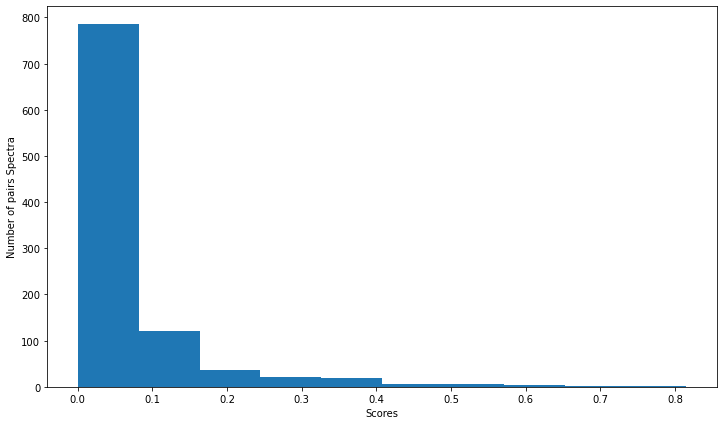

In [128]:
plt.figure(figsize=(12,7))
hist = plt.hist(scores_hist2)
plt.xlabel("Scores")
plt.ylabel("Number of pairs Spectra")

hist

Text(0, 0.5, 'Scores')

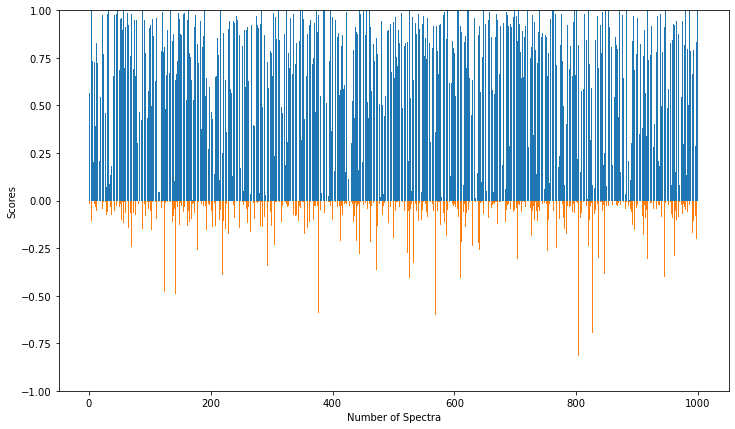

In [136]:
number_of_scores = np.arange(1, 1001)
start, end = 0, 1000
plt.figure(figsize=(12,7))
plt.bar(number_of_scores[start:end], +scores_hist[start:end])
plt.bar(number_of_scores[start:end], -scores_hist2[start:end])
plt.ylim(-1.00,+1.00)
plt.xlabel("Number of Spectra")
plt.ylabel("Scores")